In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("dataset/train.csv")

dataset.duplicated().any()

False

In [3]:
X = dataset.iloc[:, 1: -1]
y = dataset.iloc[:, -1]

In [4]:
X.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338


In [5]:
X.describe()

,Compartments,Weight Capacity (kg)
count,300000.000000,299862.000000
mean,5.443590,18.029994
std,2.890766,6.966914
min,1.000000,5.000000
25%,3.000000,12.097867
50%,5.000000,18.068614
75%,8.000000,24.002375
max,10.000000,30.000000


In [6]:
X.nunique()

Brand                        5
Material                     4
Size                         3
Compartments                10
Laptop Compartment           2
Waterproof                   2
Style                        3
Color                        6
Weight Capacity (kg)    181596
dtype: int64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
dtypes: float64(2), object(7)
memory usage: 20.6+ MB


In [8]:
X.isnull().sum()

Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
dtype: int64

In [9]:
X.select_dtypes(include=["int64", "float64"]).columns

Index(['Compartments', 'Weight Capacity (kg)'], dtype='object')

In [10]:
X["Weight Capacity (kg)"] = X["Weight Capacity (kg)"].fillna(X["Weight Capacity (kg)"].mean())

In [11]:
for i in X.select_dtypes(include="object").columns:
    X[i].fillna(X[i].mode()[0], inplace=True)
    
X

C:\Users\HP\AppData\Local\Temp\ipykernel_21740\2786364593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[i].fillna(X[i].mode()[0], inplace=True)


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338
...,...,...,...,...,...,...,...,...,...
299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812
299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182
299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250
299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738


In [12]:
X.isnull().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

X

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,1,1,1,7.0,1,0,2,0,11.611723
1,1,0,2,10.0,1,1,1,3,27.078537
2,4,1,2,2.0,1,0,1,5,16.643760
3,2,2,2,8.0,1,0,1,3,12.937220
4,0,0,1,1.0,1,1,1,3,17.749338
...,...,...,...,...,...,...,...,...,...
299995,0,1,2,9.0,0,0,2,1,12.730812
299996,1,1,0,6.0,0,1,2,1,26.633182
299997,3,0,0,9.0,1,1,0,4,11.898250
299998,0,2,2,1.0,0,1,2,4,6.175738


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y_original = y_train
y_train = y_train.values.reshape(-1, 1)

y_train = scaler.fit_transform(y_train)
y_train

array([[0.09693741],
       [0.79804556],
       [0.49022193],
       ...,
       [1.        ],
       [0.82558867],
       [0.81328541]])

<Axes: ylabel='Brand'>

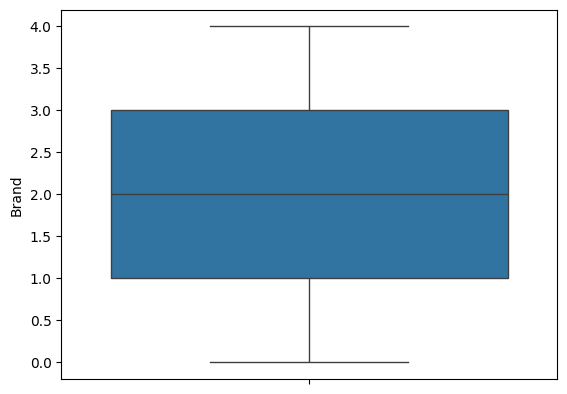

In [16]:
sns.boxplot(X["Brand"])

<Axes: ylabel='Material'>

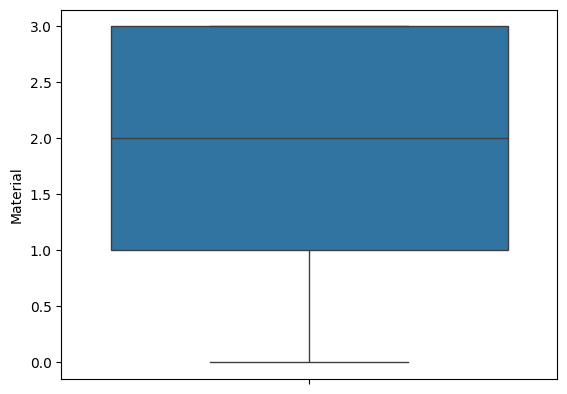

In [17]:
sns.boxplot(X['Material'])

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

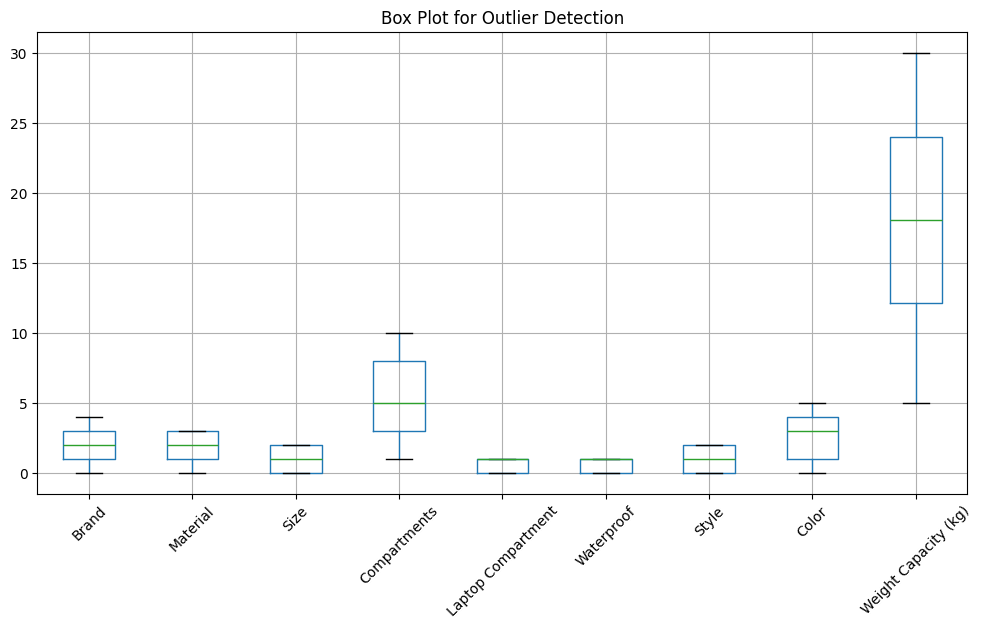

In [19]:
plt.figure(figsize=(12, 6))
X.boxplot()
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.show()

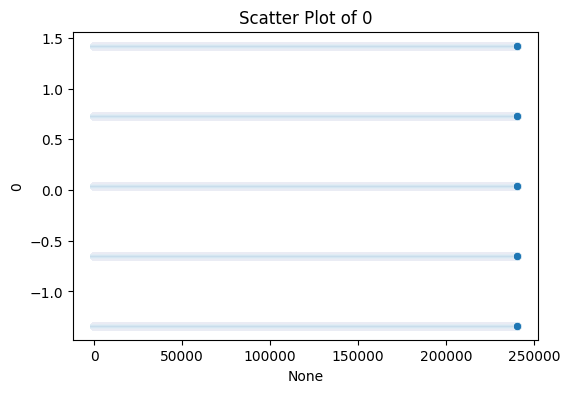

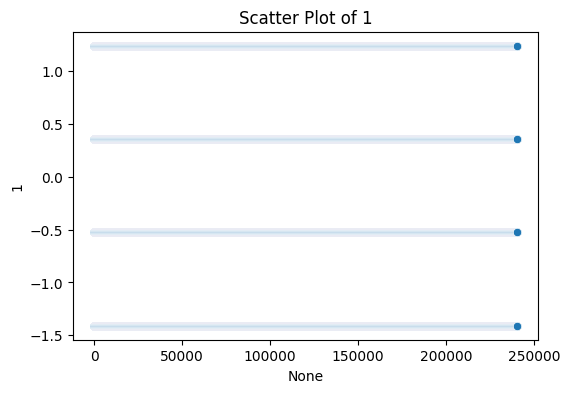

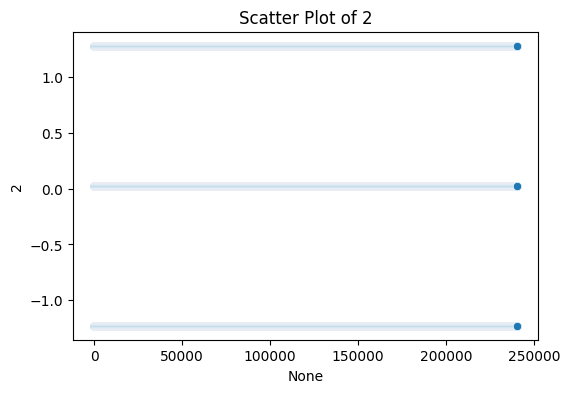

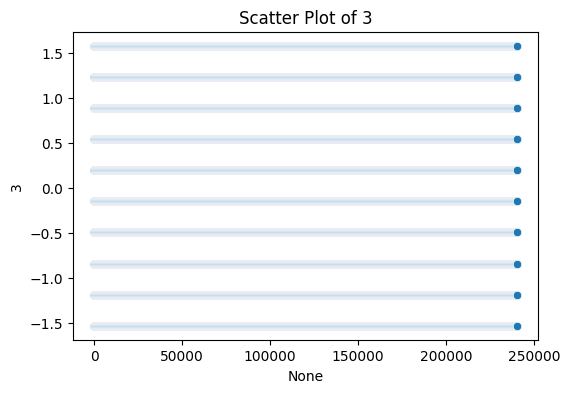

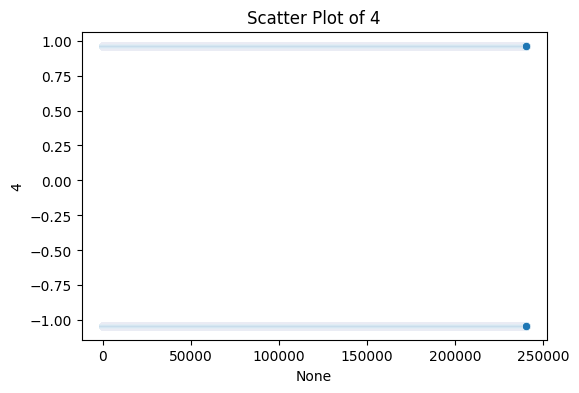

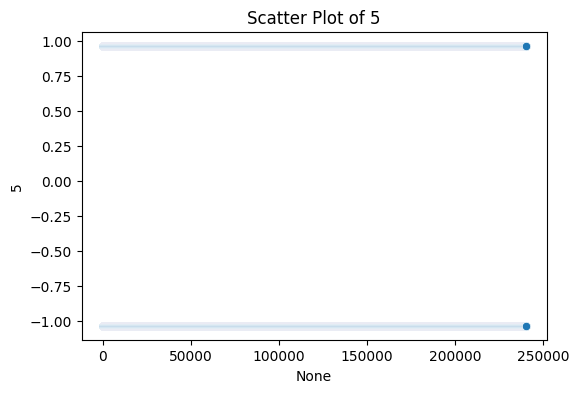

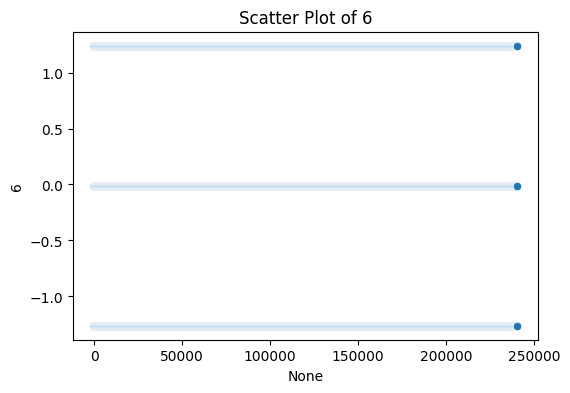

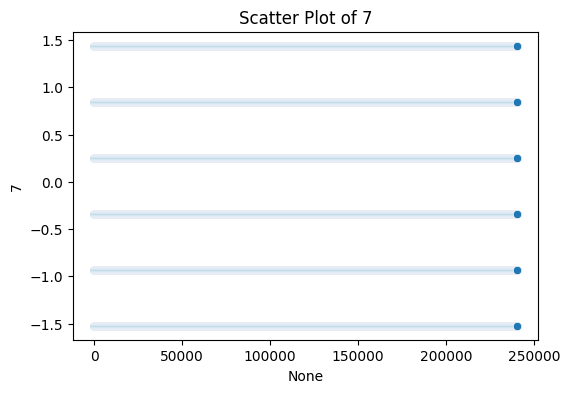

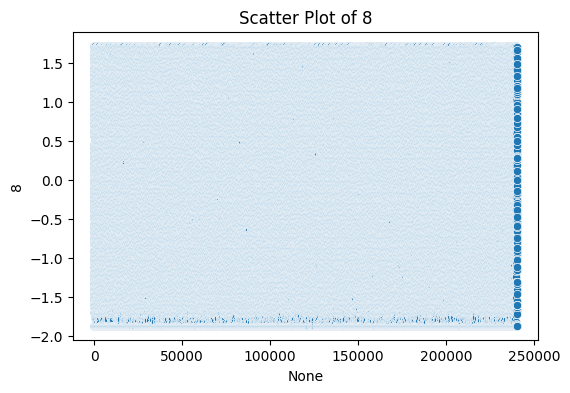

In [23]:
X_train = pd.DataFrame(X_train)
for col in X_train.columns[:]:  # Adjust based on your dataset
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train.index, y=X_train[col])
    plt.title(f"Scatter Plot of {col}")
    plt.show()

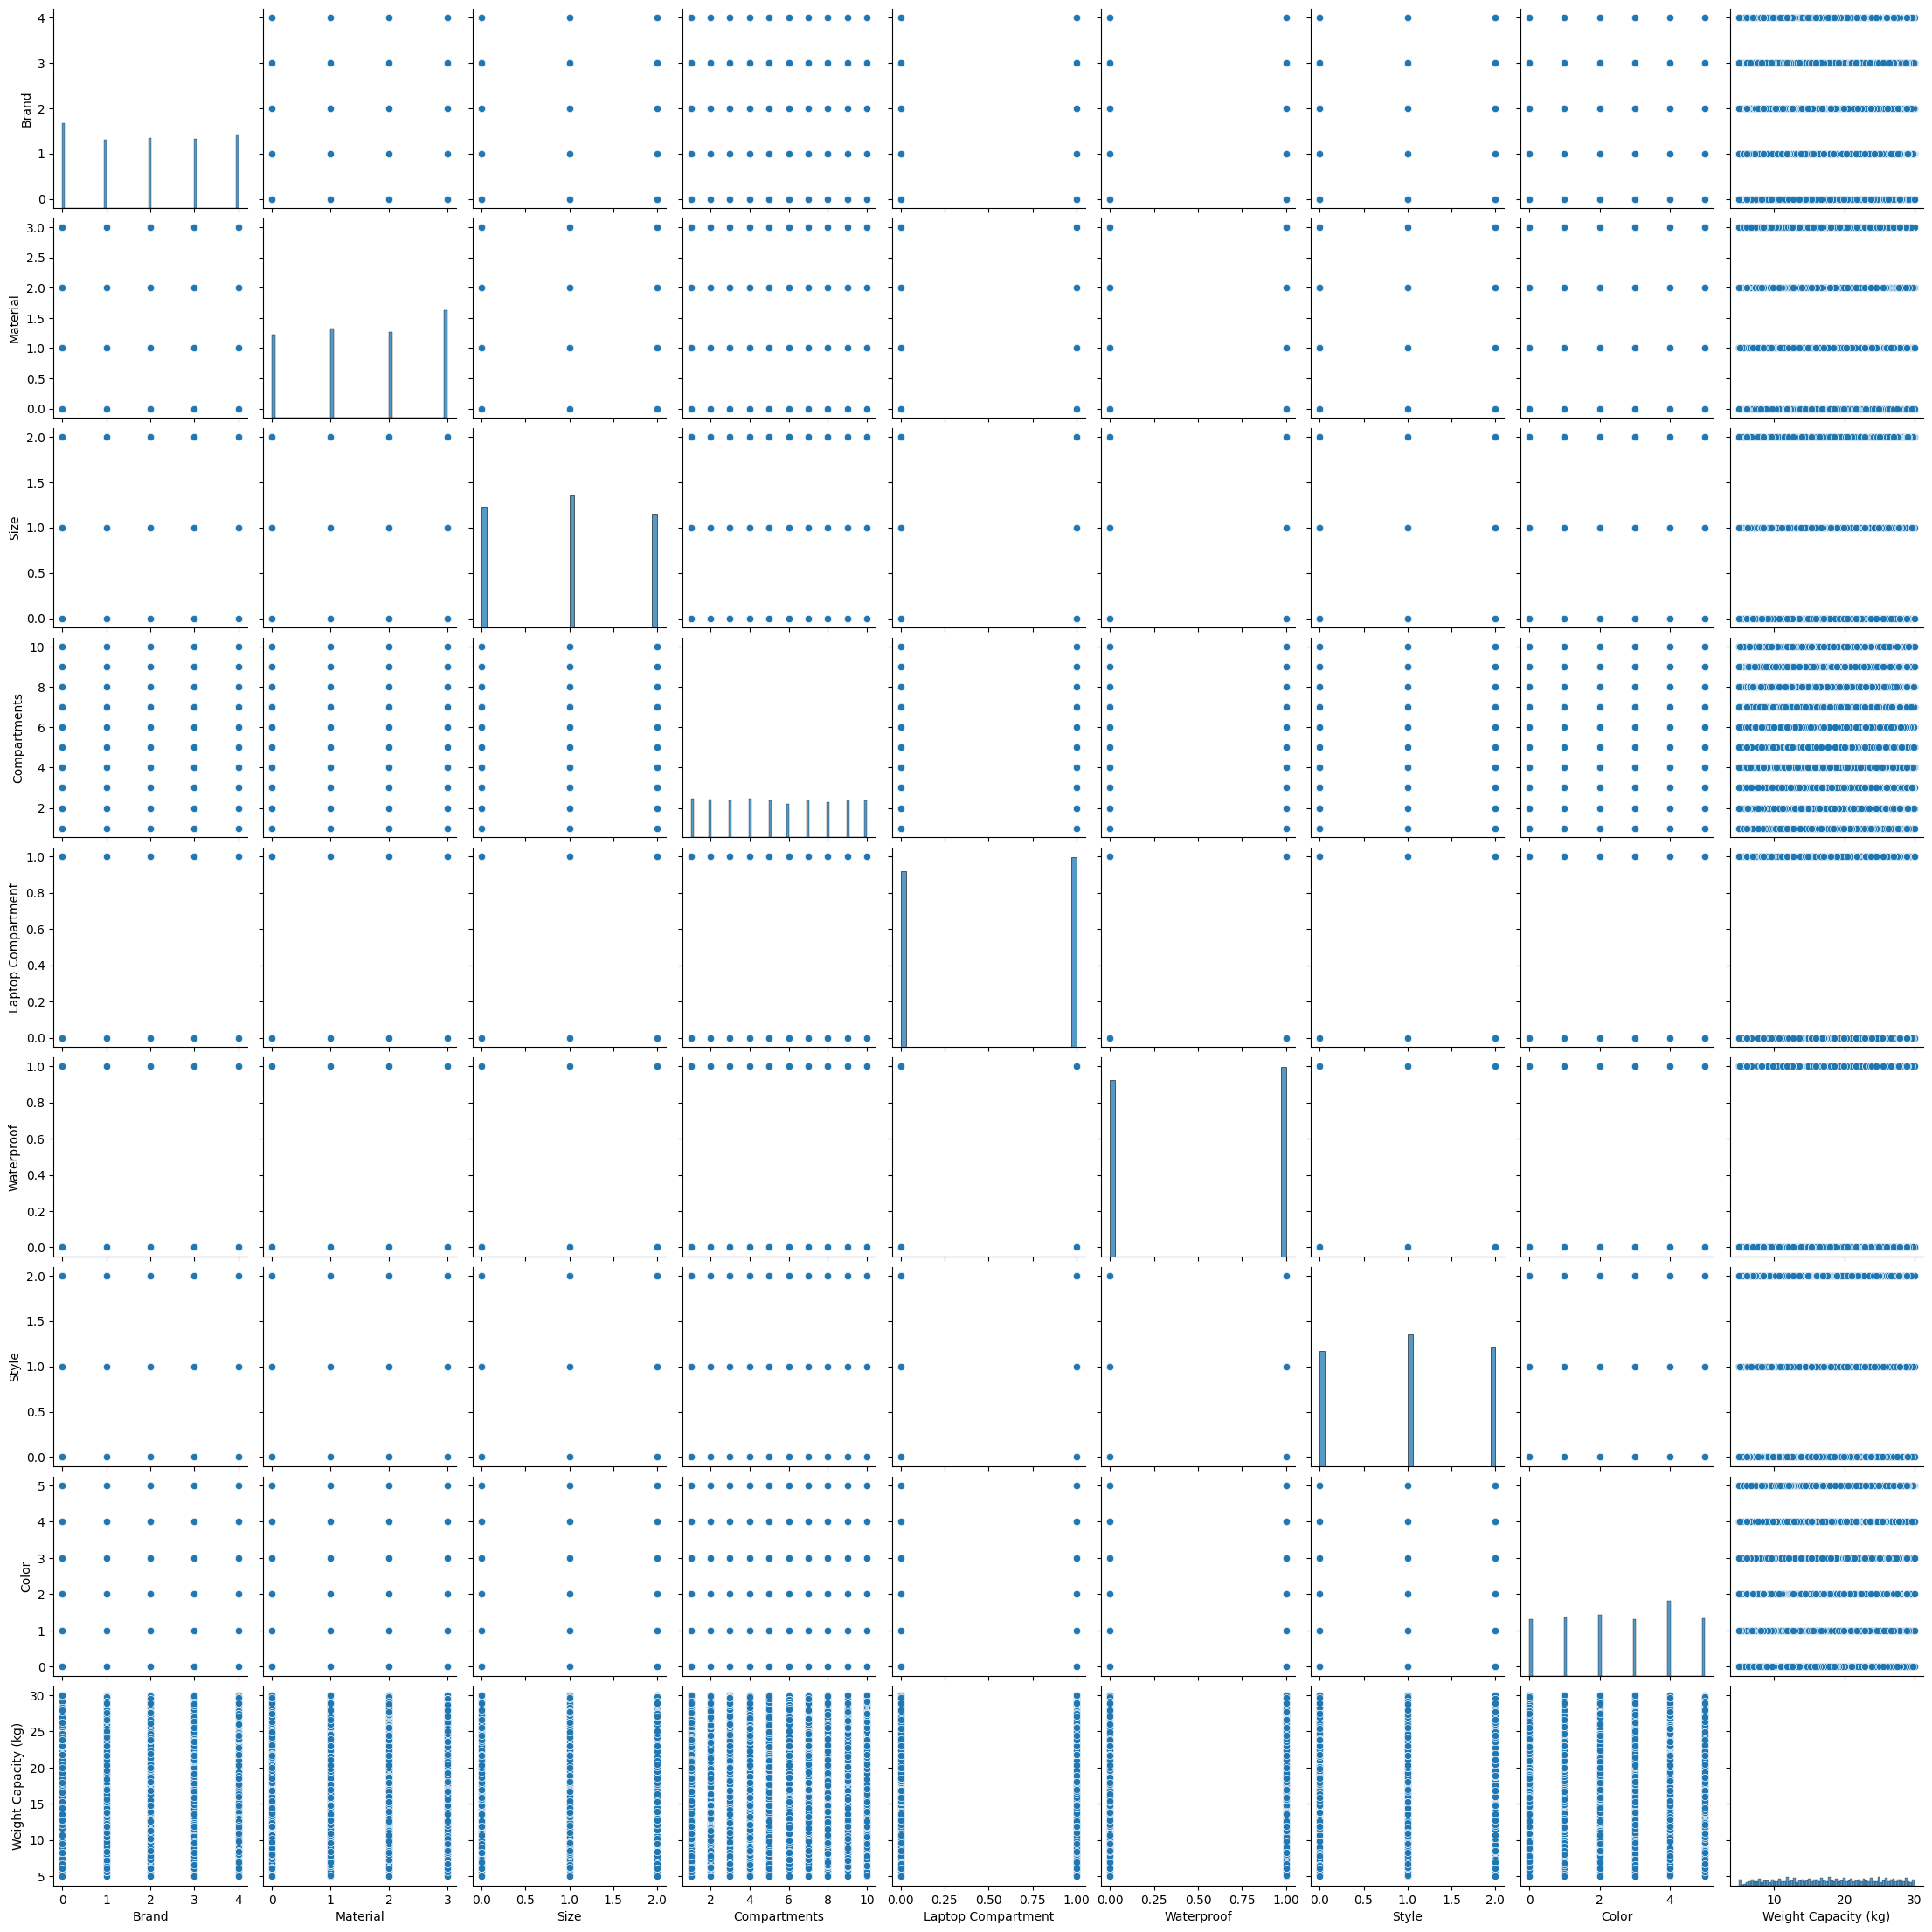

In [24]:
sns.pairplot(X)
plt.show()

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = y_pred.flatten()

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-0.1518215034746404

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

41.792985961841616

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=3)

for i in range(0, 3):
    print(accuracies[i])
print()

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))

print('Accuracy: {:.2f} %'.format(accuracies.std()*100))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-0.14950273035113848
-0.15509590188345257
-0.15237542498923418

Accuracy: -15.23 %
Accuracy: 0.23 %


Decision tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 20)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = y_pred.flatten()

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.0574464015651404

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred)) 

55.85667440533382

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=3)

for i in range(0, 3):
    print(accuracies[i])
print()

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))

print('Accuracy: {:.2f} %'.format(accuracies.std()*100))

-1.042848147405878
-1.044317562283712
-1.0572885346468492

Accuracy: -104.82 %
Accuracy: 0.65 %


HistGradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
regressor = HistGradientBoostingRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = y_pred.flatten()

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.001304607289998927

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred)) 

38.91592279781966

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=3)

for i in range(0, 3):
    print(accuracies[i])
print()

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))

print('Accuracy: {:.2f} %'.format(accuracies.std()*100))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0011338741748502246
0.0007816355781284923
0.0005949381288188338

Accuracy: 0.08 %
Accuracy: 0.02 %


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = y_pred.flatten()

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.00044749672354582604

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred)) 

38.93261862686097

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=3)

for i in range(0, 3):
    print(accuracies[i])
print()

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))

print('Accuracy: {:.2f} %'.format(accuracies.std()*100))

0.0004640516342429013
0.0001267308706716097
0.00029777729503577266

Accuracy: 0.03 %
Accuracy: 0.01 %


Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

y_pred = regressor.predict(X_test_poly)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = y_pred.flatten()

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0011411324523512567

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred)) 

38.91910770980178

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=3)

for i in range(0, 3):
    print(accuracies[i])
print()

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))

print('Accuracy: {:.2f} %'.format(accuracies.std()*100))

0.0004640516342429013
0.0001267308706716097
0.00029777729503577266

Accuracy: 0.03 %
Accuracy: 0.01 %


XGBoost

In [ ]:
from xgboost import XGBRegressor

regressor = XGBRegressor(
    n_estimators=1000,        # Number of trees
    learning_rate=0.05,       # Step size shrinkage
    max_depth=6,              # Maximum tree depth
    subsample=0.8,            # Subsampling ratio of the training instance
    colsample_bytree=0.8,     # Subsampling ratio of columns when constructing each tree
    random_state=0
)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = y_pred.flatten()

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.006911296776410225

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred)) 

39.075668505620165